In [1]:
from __future__ import print_function

import numpy as np
import reflexxes
import random
import pandas as pd
from numpy import genfromtxt

# visualiation
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

from hmmlearn import hmm
from scipy.optimize import linear_sum_assignment
from sklearn.metrics.pairwise import euclidean_distances

In [2]:
# load data
org_p = np.loadtxt('../Trajectory/data/original_position_list.csv', delimiter=' ')
org_v = np.loadtxt('../Trajectory/data/original_velocity_list.csv', delimiter=' ')
nos_p_001 = np.loadtxt('../Trajectory/data/position_noise_0.01.csv', delimiter=' ')
nos_p_01 = np.loadtxt('../Trajectory/data/position_noise_0.1.csv', delimiter=' ')
nos_p_1 = np.loadtxt('../Trajectory/data/position_noise_1.csv', delimiter=' ')

traj_lens = np.loadtxt('../Trajectory/data/traj_lens.csv', delimiter=' ')
traj_lens = traj_lens.astype(int)

In [3]:
# reframe dataset as per traj_lens
traj_lens_cumsum = traj_lens.cumsum()
traj_lens_cumsum = np.delete(traj_lens_cumsum, len(traj_lens_cumsum) - 1)

org_p_spl = np.split(org_p, traj_lens_cumsum, axis=0)
org_v_spl = np.split(org_v, traj_lens_cumsum, axis=0)
nos_p_001_spl = np.split(nos_p_001, traj_lens_cumsum, axis=0)
nos_p_01_spl = np.split(nos_p_01, traj_lens_cumsum, axis=0)
nos_p_1_spl = np.split(nos_p_1, traj_lens_cumsum, axis=0)

print(f'org_p.size: {len(org_p_spl)}')
print(f'org_v.size: {len(org_v_spl)}')
print(f'nos_p_001.size: {len(nos_p_001_spl)}')
print(f'nos_p_01.size: {len(nos_p_01_spl)}')
print(f'nos_p_1.size: {len(nos_p_1_spl)}')

org_p.size: 100
org_v.size: 100
nos_p_001.size: 100
nos_p_01.size: 100
nos_p_1.size: 100


In [4]:
# plot data function
def on_key_press(event):
    if event.key == 'escape':
        plt.close()
        
def original_plot(x, dd, dddx):
    t = np.linspace(0, len(x) * gen.cycle_time, len(x))
    fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
    fig.canvas.mpl_connect('key_press_event', on_key_press)
    ax1.plot(t, x)
    ax1.set_ylabel('position')
    ax1.legend('123', title='DOF #')
    ax2.plot(t, dx)
    ax2.set_ylabel('velocity')
    ax2.legend('123', title='DOF #')
    ax3.plot(t, ddx)
    ax3.set_ylabel('acceleration')
    ax3.legend('123', title='DOF #')
    ax3.set_xlabel('time')
    plt.show()
    
def plot_trajectory(x, title):
    x = np.array(x)
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    plt.title(title)
    xline = x[:,0]
    yline = x[:,1]
    zline = x[:,2]
    ax.plot3D(xline, yline, zline, 'green')

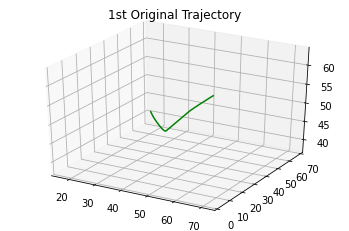

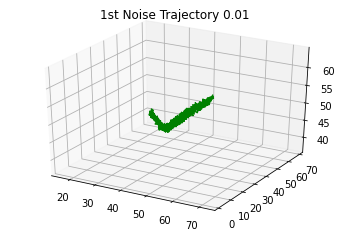

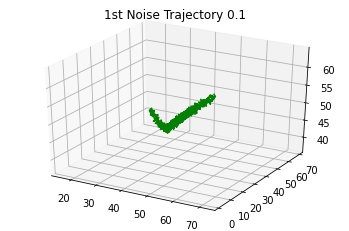

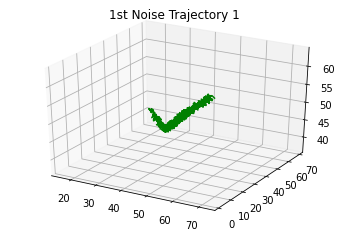

In [6]:
# plot 1st trajectory 
plot_trajectory(org_p_spl[0], '1st Original Trajectory')
plot_trajectory(nos_p_001_spl[0], '1st Noise Trajectory 0.01')
plot_trajectory(nos_p_01_spl[0], '1st Noise Trajectory 0.1')
plot_trajectory(nos_p_1_spl[0], '1st Noise Trajectory 1')

In [7]:
# try label no. = 10
HMM_10 = hmm.GaussianHMM(n_components=10, covariance_type="full", n_iter=len(traj_lens), verbose=True)
HMM_10.fit(org_p, traj_lens)

         1     -937716.5316             +nan
         2     -876559.8659      +61156.6657
         3     -813575.4389      +62984.4270
         4     -783620.4749      +29954.9640
         5     -769421.9236      +14198.5513
         6     -766772.4315       +2649.4921
         7     -766027.5939        +744.8376
         8     -765646.8575        +380.7364
         9     -765402.2254        +244.6320
        10     -765169.9033        +232.3221
        11     -764871.6295        +298.2739
        12     -764594.9344        +276.6951
        13     -764378.3639        +216.5705
        14     -764273.3695        +104.9944
        15     -764210.2491         +63.1203
        16     -764143.9241         +66.3250
        17     -764085.6803         +58.2438
        18     -764048.0260         +37.6543
        19     -764030.9869         +17.0391
        20     -764020.2638         +10.7231
        21     -764008.9321         +11.3317
        22     -763980.6152         +28.3169
        23

GaussianHMM(algorithm='viterbi', covariance_type='full', covars_prior=0.01,
            covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
            min_covar=0.001, n_components=10, n_iter=100, params='stmc',
            random_state=None, startprob_prior=1.0, tol=0.01,
            transmat_prior=1.0, verbose=True)

[[14.37893435 42.85083834 80.56106204]
 [39.50819643 49.40988881 46.09092422]
 [80.91777994 73.11899259 34.10516103]
 [27.01574498 19.49709924 22.04947872]
 [30.35260364 13.88135209 67.55336889]
 [60.11782475 51.912754   79.58930758]
 [13.58137091 74.79749935 36.13329817]
 [36.89392848 76.81152346 80.25800476]
 [73.19377705 25.79981231 81.40681155]
 [67.14881701 49.70399761 36.58255567]]


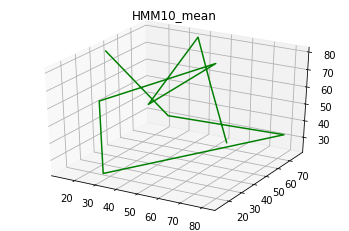

In [8]:
# plot means
plot_trajectory(HMM_10.means_, 'HMM10_mean')
print(HMM_10.means_)

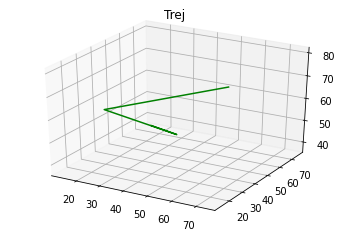

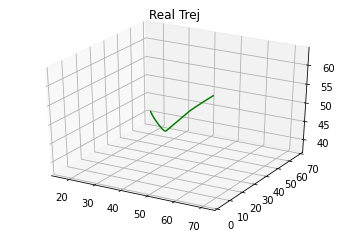

In [35]:
pred = HMM_10.predict(org_p_spl[0])
trej = []
for point in pred:
    trej.append(HMM_10.means_[point])
plot_trajectory(trej, 'Trej')
plot_trajectory(org_p_spl[0], 'Real Trej')

In [14]:
'''
org_states = HMM_10.predict(org_p)
nos_001_states = HMM_10.predict(nos_p_001)
nos_01_states = HMM_10.predict(nos_p_01)
nos_1_states = HMM_10.predict(nos_p_1)
'''

count_001 = 0
count_01 = 0
count_1 = 0

for i in range(len(traj_lens)): # which is 100
    org_states = HMM_10.predict(org_p_spl[i])
    nos_001_states = HMM_10.predict(nos_p_001_spl[i])
    nos_01_states = HMM_10.predict(nos_p_01_spl[i])
    nos_1_states = HMM_10.predict(nos_p_1_spl[i])
    
    for j in range(len(org_states)):
        if org_states[j] != nos_001_states[j]:
            #print(f'{i+1} trajectory: ')
            #print(f'org_states[{j}]: {org_states[j]}')
            #print(f'nos_states[{j}]: {nos_states[j]}')
            #print('\n')
            count_001 += 1
        if org_states[j] != nos_01_states[j]:
            count_01 += 1
        if org_states[j] != nos_1_states[j]:
            count_1 += 1

print('HMM_10 Rate:')
print(f'Noise 0.01:\t{(len(org_p) - count_001)*100/len(org_p)}%')
print(f'Noise 0.1:\t{(len(org_p) - count_01)*100/len(org_p)}%')
print(f'Noise 1:\t{(len(org_p) - count_1)*100/len(org_p)}%')

HMM_10 Rate:
Noise 0.01:	99.55386949924127%
Noise 0.1:	99.50227617602428%
Noise 1:	99.46282245827011%


In [20]:
# try label no. = 20
HMM_20 = hmm.GaussianHMM(n_components=20, covariance_type="full", n_iter=len(traj_lens), verbose=True)
HMM_20.fit(org_p, traj_lens)

         1     -940242.8552             +nan
         2     -874934.2369      +65308.6184
         3     -813526.9218      +61407.3150
         4     -776294.6287      +37232.2931
         5     -737928.2803      +38366.3484
         6     -719470.0884      +18458.1918
         7     -714361.6408       +5108.4476
         8     -712237.9420       +2123.6989
         9     -710966.5842       +1271.3578
        10     -709932.3605       +1034.2237
        11     -709524.5767        +407.7839
        12     -709298.4734        +226.1033
        13     -709104.3745        +194.0989
        14     -708951.2619        +153.1126
        15     -708854.4571         +96.8048
        16     -708786.0478         +68.4092
        17     -708728.8056         +57.2422
        18     -708702.8430         +25.9626
        19     -708679.4481         +23.3950
        20     -708663.2574         +16.1907
        21     -708655.3398          +7.9175
        22     -708650.4232          +4.9167
        23

GaussianHMM(algorithm='viterbi', covariance_type='full', covars_prior=0.01,
            covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
            min_covar=0.001, n_components=20, n_iter=100, params='stmc',
            random_state=None, startprob_prior=1.0, tol=0.01,
            transmat_prior=1.0, verbose=True)

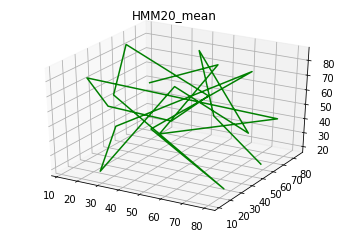

In [24]:
# plot means
plot_trajectory(HMM_20.means_, 'HMM20_mean')
#print(HMM_20.means_)

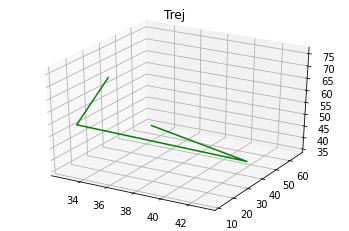

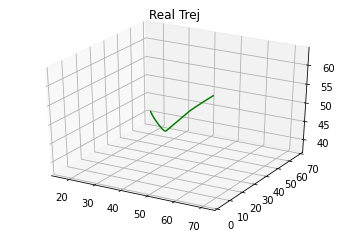

In [34]:
pred = HMM_20.predict(org_p_spl[0])
trej = []
for point in pred:
    trej.append(HMM_20.means_[point])
plot_trajectory(trej, 'Trej')
plot_trajectory(org_p_spl[0], 'Real Trej')

In [10]:
# try label no. = 100
HMM_100 = hmm.GaussianHMM(n_components=100, covariance_type="full", n_iter=len(traj_lens), verbose=True)
HMM_100.fit(org_p, traj_lens)

         1     -944299.7440             +nan
         2     -874023.6218      +70276.1222
         3     -811897.2613      +62126.3605
         4     -771985.2536      +39912.0077
         5     -725663.3266      +46321.9270
         6     -668420.5729      +57242.7537
         7     -617488.1967      +50932.3761
         8     -586330.5302      +31157.6665
         9     -570968.4464      +15362.0838
        10     -560176.5089      +10791.9375
        11     -554582.9526       +5593.5563
        12     -549769.4707       +4813.4819
        13     -541807.3634       +7962.1074
        14     -535539.4700       +6267.8934
        15     -529365.1561       +6174.3139
        16     -522025.2735       +7339.8825
        17     -509565.3731      +12459.9004
        18     -506093.8815       +3471.4917
        19     -503144.6098       +2949.2717
        20     -498925.2193       +4219.3905
        21     -493477.5768       +5447.6425
        22     -486944.6865       +6532.8903
        23

GaussianHMM(algorithm='viterbi', covariance_type='full', covars_prior=0.01,
            covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
            min_covar=0.001, n_components=100, n_iter=100, params='stmc',
            random_state=None, startprob_prior=1.0, tol=0.01,
            transmat_prior=1.0, verbose=True)

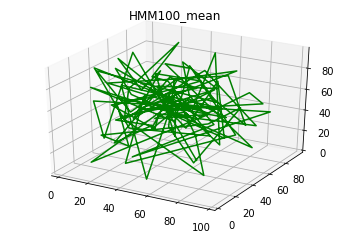

In [26]:
# plot means
plot_trajectory(HMM_100.means_, 'HMM100_mean')
#print(HMM_100.means_)

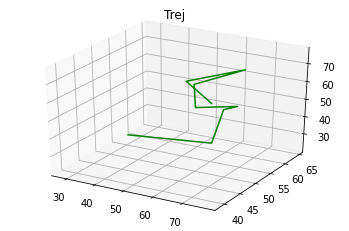

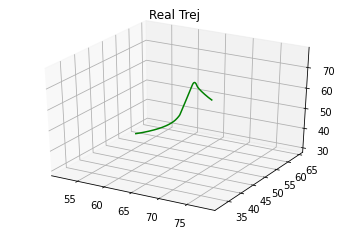

In [46]:
pred = HMM_100.predict(org_p_spl[78])
trej = []
for point in pred:
    trej.append(HMM_100.means_[point])
plot_trajectory(trej, 'Trej')
plot_trajectory(org_p_spl[78], 'Real Trej')

In [ ]:
# try label no. = 200
HMM_200 = hmm.GaussianHMM(n_components=200, covariance_type="full", n_iter=len(traj_lens), verbose=True)
HMM_200.fit(org_p, traj_lens)

         1     -944824.1182             +nan
         2     -873357.2635      +71466.8547
         3     -811657.7957      +61699.4678
         4     -771243.6085      +40414.1873
         5     -724292.6977      +46950.9108
         6     -666900.8650      +57391.8327
         7     -599265.6914      +67635.1736
         8     -541939.1629      +57326.5286
         9     -498472.1940      +43466.9688
        10     -469781.0191      +28691.1749
        11     -447551.7032      +22229.3160
        12     -417969.4779      +29582.2253
        13     -383683.2912      +34286.1867
        14     -349813.7652      +33869.5260
        15     -323191.1333      +26622.6319
        16     -284522.0836      +38669.0497
        17     -242809.3399      +41712.7437
        18     -201534.3428      +41274.9971
        19     -177924.1144      +23610.2284
        20     -168242.8732       +9681.2412
        21     -146079.7721      +22163.1011
        22     -133838.4038      +12241.3683
